In [4]:
from matplotlib import font_manager, pyplot as plt
import numpy as np
import pandas as pd

# 查找系统中所有可用的Times New Roman字体的路径
times_new_roman = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# 从列表中找到一个指定的字体名称，并确保字体能支持加粗
t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f and 'Bold' in f]

if t_nr_path:
    # 如果找到了Times New Roman Bold字体，设置为默认字体
    prop = font_manager.FontProperties(fname=t_nr_path[0])
    plt.rcParams['font.family'] = prop.get_name()
    plt.rcParams['font.weight'] = 'bold'  # 设置字体为加粗
else:
    # 如果没有找到加粗的Times New Roman，尝试设置为普通的Times New Roman并加粗
    t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f]
    if t_nr_path:
        prop = font_manager.FontProperties(fname=t_nr_path[0])
        plt.rcParams['font.family'] = prop.get_name()
        plt.rcParams['font.weight'] = 'bold'
    else:
        # 如果没有找到Times New Roman，使用默认的衬线字体并设置为加粗
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.weight'] = 'bold'

## 折线图

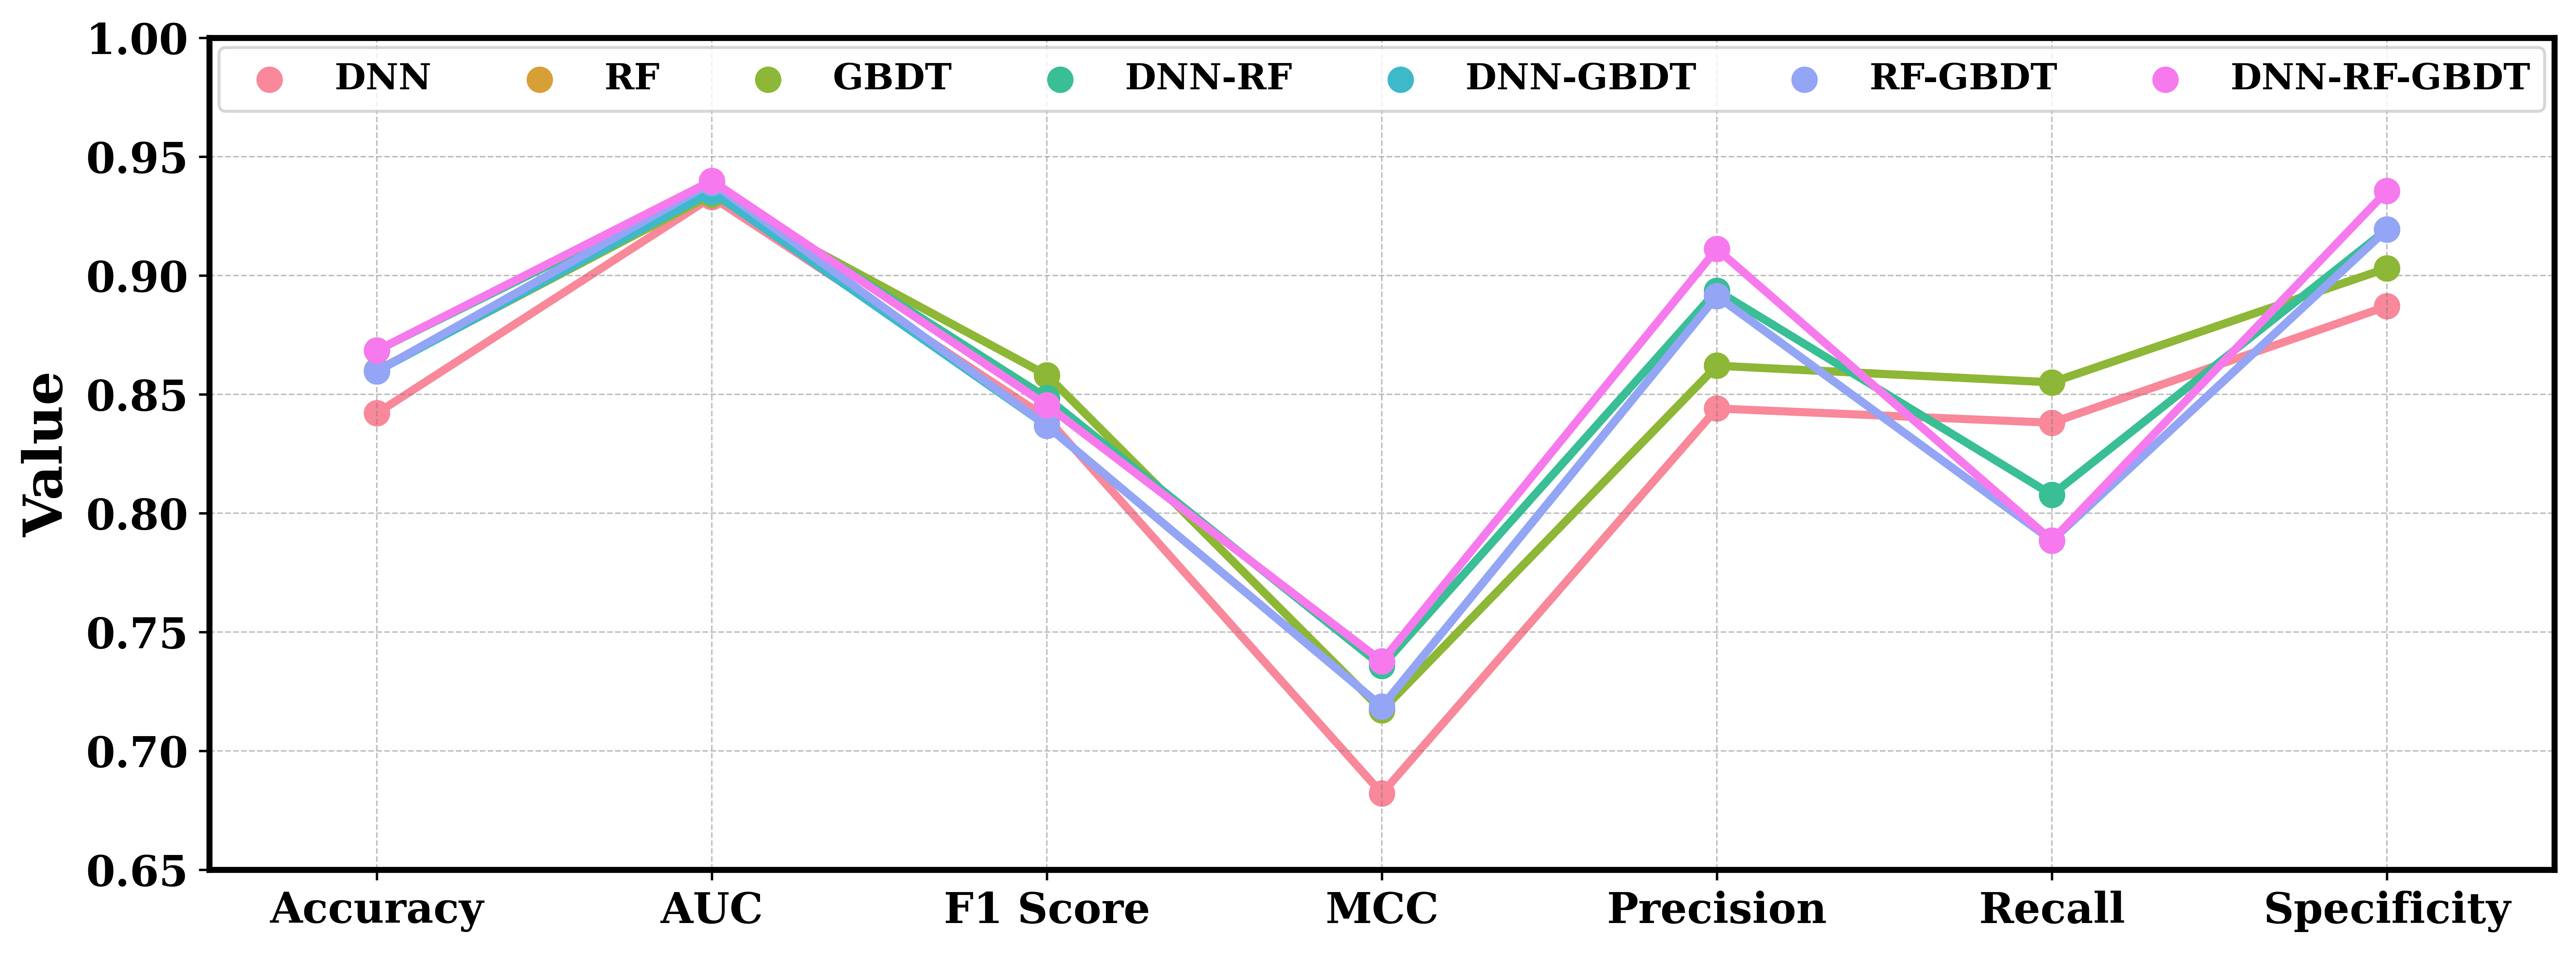

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the data
df = pd.read_csv("./stacking.csv")

# Transforming the DataFrame from wide to long format
df_long = df.melt(id_vars=['Scores'], var_name='label', value_name='value')

# Setting the color palette
pal2 = sns.color_palette(['#2a557f','#45bc9c','#f05076','#ffcd6e'])
sns.set_palette(pal2)

# Creating the plot
fig = plt.figure(figsize=(14, 5), dpi=600)
sns.pointplot(x="Scores", y="value", hue="label", data=df_long)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
bwith =2
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.tick_params(axis='both', labelsize=18)

# Adjusting labels and legend
plt.xlabel("")  # Clear the x-axis label if not needed
plt.ylabel("Value", fontsize=18, fontweight='bold')
ax.legend(loc="lower left", fontsize=18)

# 设置图例
# Setting the legend with dynamic column count based on unique labels
unique_labels = df_long['label'].unique()
ax.legend(fontsize='12', ncol=len(unique_labels), loc='upper center', bbox_to_anchor=(0.5, 1.01))
# Adding background grid
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
# 设置y轴的范围
ax.set_ylim(0.65, 1.0)
ax.tick_params(axis='x', labelsize=14)   # 字体大小
ax.tick_params(axis='y', labelsize=14)   # 字体大小
# Uncomment the next line if you want to save the figure
plt.savefig("stacking条形图.svg", bbox_inches="tight")

plt.show()

## 柱状图

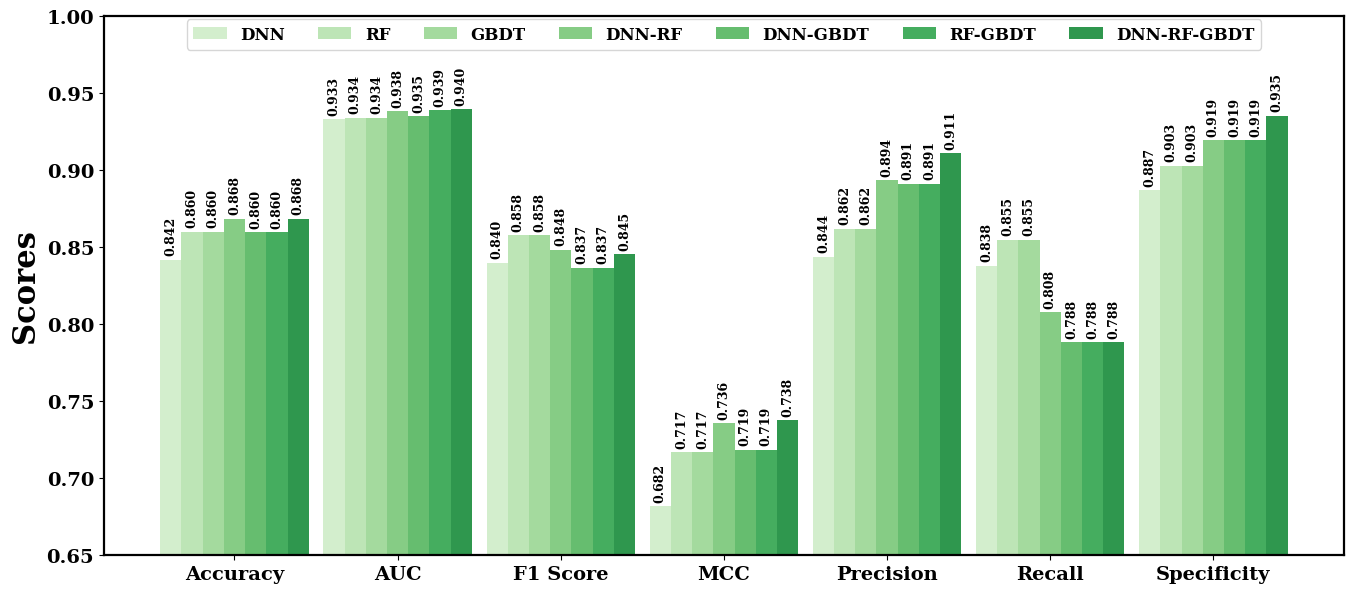

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm  # 导入colormap

# 读取数据，确保文件路径正确
file_path = './stacking.csv'  # 需要你替换为实际文件路径
df = pd.read_csv(file_path)

# 设置索引
df.set_index('Scores', inplace=True)

# 获取除了索引列外的所有列名
features = df.columns.tolist()

# 设置颜色映射
cmap = cm.get_cmap('Greens')
color_start = 0.2  # 开始颜色的强度
color_end = 0.700   # 结束颜色的强度
colors = [cmap(color_start + (color_end - color_start) * i / (len(features) - 1)) for i in range(len(features))]

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(16, 7))
width = 0.13  # 柱子宽度
xticks = np.arange(len(df))  # 模型位置

# 绘制每个特征的数据
for i, column in enumerate(features):
    bars = ax.bar(xticks + i * width - width, df[column], width, label=column, color=colors[i])

# 在每个条形上添加文本标签
for bars in ax.containers:
    ax.bar_label(bars, padding=3, fontsize=9, rotation=90, color='black', label_type='edge', fmt='%.3f')

# 添加标签、标题和自定义X轴刻度
ax.set_ylabel('Scores', fontsize=22, fontweight='bold')
ax.set_xticks(xticks + width / 2 * (len(features) - 3))
ax.set_xticklabels(df.index)

# 设置图例
ax.legend(fontsize='12', ncol=len(features), loc='upper center', bbox_to_anchor=(0.5, 1.01))

# 设置y轴的范围
ax.set_ylim(0.65, 1.0)
ax.tick_params(axis='x', labelsize=14)   # 字体大小
ax.tick_params(axis='y', labelsize=14)   # 字体大小
# 设置边框加粗
for spine in ax.spines.values():
    spine.set_linewidth(1.6)
    
plt.savefig("stacking.svg", bbox_inches="tight", dpi=600) # 保存图形
# 显示图形
plt.show()

/tmp/ipykernel_2924361/1601917067.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


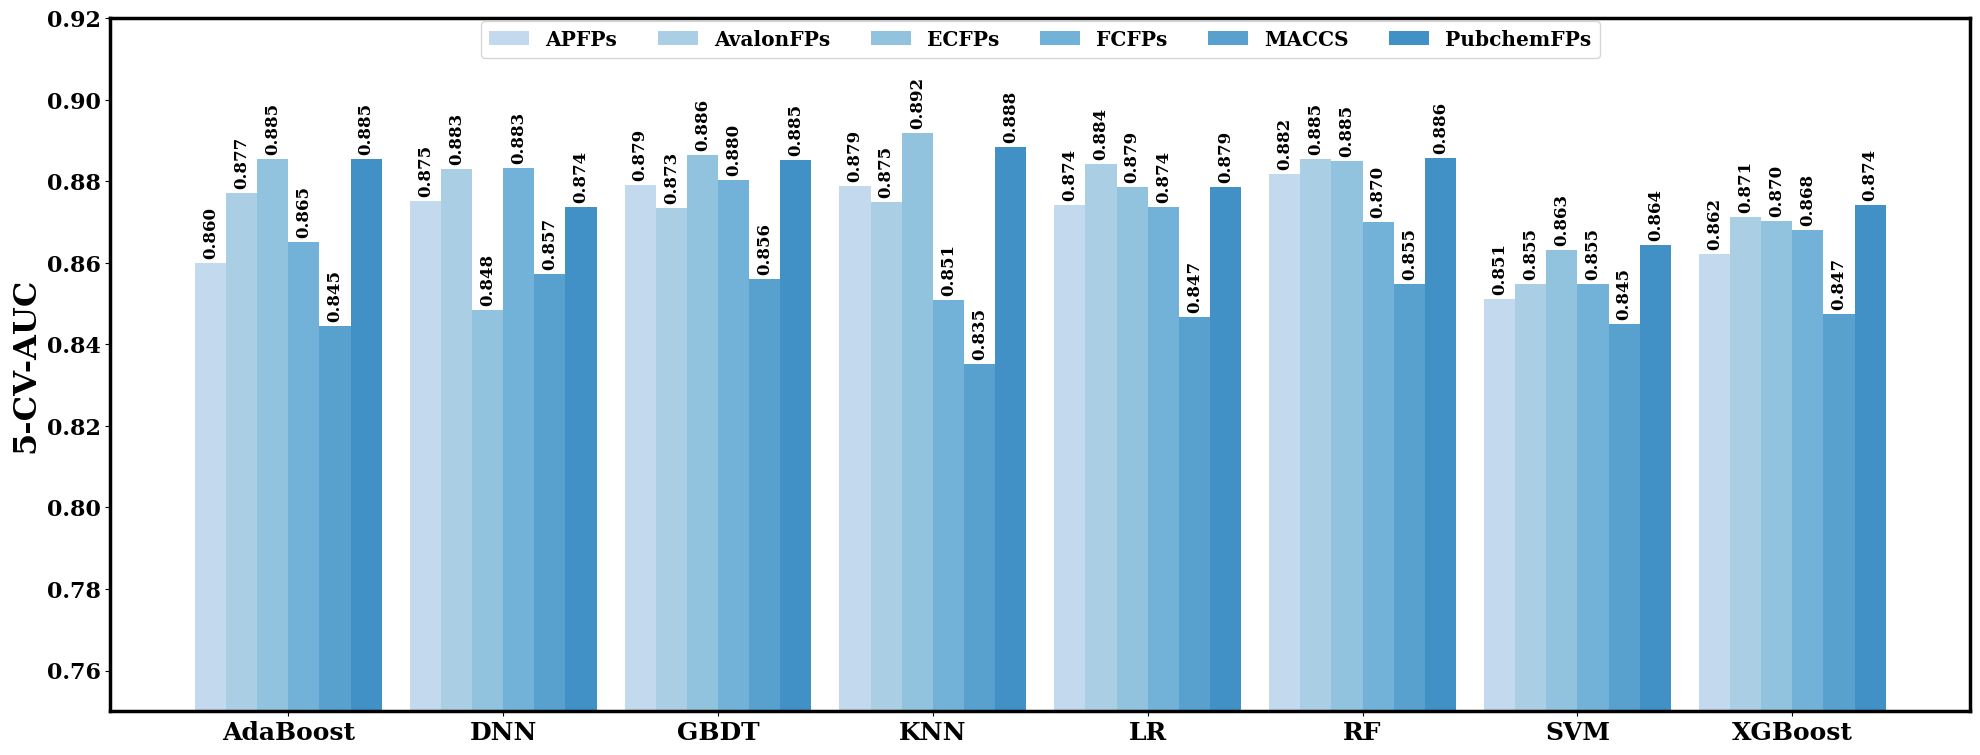

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm

# 文件路径和特征名称
file_paths = [
    '5-CV-AUC-APFPs.csv',
    '5-CV-AUC-AvalonFPs.csv',
    '5-CV-AUC-ECFPs.csv',
    '5-CV-AUC-FCFPs.csv',
    '5-CV-AUC-MACCS.csv',
    '5-CV-AUC-PubchemFPs.csv',
]
features = ['APFPs', 'AvalonFPs', 'ECFPs', 'FCFPs', 'MACCS', 'PubchemFPs']
models = ['AdaBoost', 'DNN', 'GBDT', 'KNN', 'LR', 'RF', 'SVM', 'XGBoost']

# 读取数据
dfs = [pd.read_csv(file, encoding='GBK') for file in file_paths]

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(24, 9))
width = 0.145  # 柱子宽度
xticks = np.arange(len(models))  # 模型位置

# 使用colormap生成颜色渐变，但限制色彩变化
#cmap = plt.get_cmap('Blues', len(models))
cmap = cm.get_cmap('Blues')
color_start = 0.265  # 开始颜色的强度
color_end = 0.700   # 结束颜色的强度
colors = [cmap(color_start + (color_end - color_start) * i / len(features)) for i in range(len(features))]

# 绘制每个特征的数据
for i, (df, feature) in enumerate(zip(dfs, features)):
    averages = df["average"].values
    bars = ax.bar(xticks + i * width, averages, width=width, label=feature, color=colors[i])
    ax.bar_label(bars, padding=3, fontsize=12, rotation=90, color='black', label_type='edge', fmt='%.3f')

# 添加标签、标题和自定义X轴刻度
ax.set_ylabel('5-CV-AUC', fontsize=23, fontweight='bold')
ax.set_xticks(xticks + width * (len(features) - 1) / 2)
ax.set_xticklabels(models, fontsize=18, rotation=0)

# 设置图例
ax.legend(fontsize='14.5', ncol=len(features), loc='upper center', bbox_to_anchor=(0.5, 1.01))

# 设置y轴的范围
ax.set_ylim(0.75, 0.92)
ax.tick_params(axis='y', labelsize=16)

# 设置边框加粗
for spine in ax.spines.values():
    spine.set_linewidth(2.5)

# 显示图形并保存图片
plt.savefig("5-CV-AUC热图-1.svg", bbox_inches="tight", dpi=600) # 保存图形
plt.show()

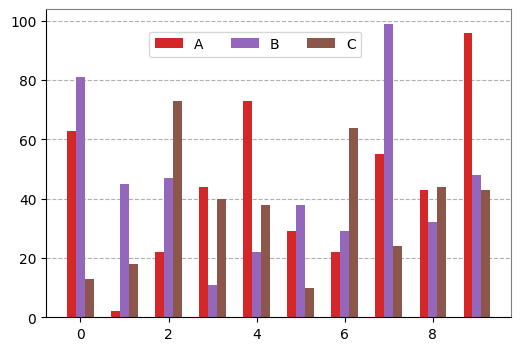

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 分组柱形图
# 1. 生成数据
np.random.seed(20230811)
x = np.arange(10)
y1 = np.random.randint(0, 100, 10)
y2 = np.random.randint(0, 100, 10)
y3 = np.random.randint(0, 100, 10)

# 2. 创建画布
fig = plt.figure(figsize=(6, 4), dpi=100)
ax = fig.add_subplot(111)

# 3. 绘制柱形图
ax.bar(x - 0.2, y1, width=0.2, color='C3', label='A')
ax.bar(x, y2, width=0.2, color='C4', label='B')
ax.bar(x + 0.2, y3, width=0.2, color='C5', label='C')

# 4. 设置样式
ax.grid(axis='y', linestyle='--')
ax.set_axisbelow(True)
ax.spines[['right', 'top']].set_color('C7')
ax.legend(ncols=3, loc='upper center', bbox_to_anchor=(0.45, 0.95))
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#显示数值,数值比较多就不显示了
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.3f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)


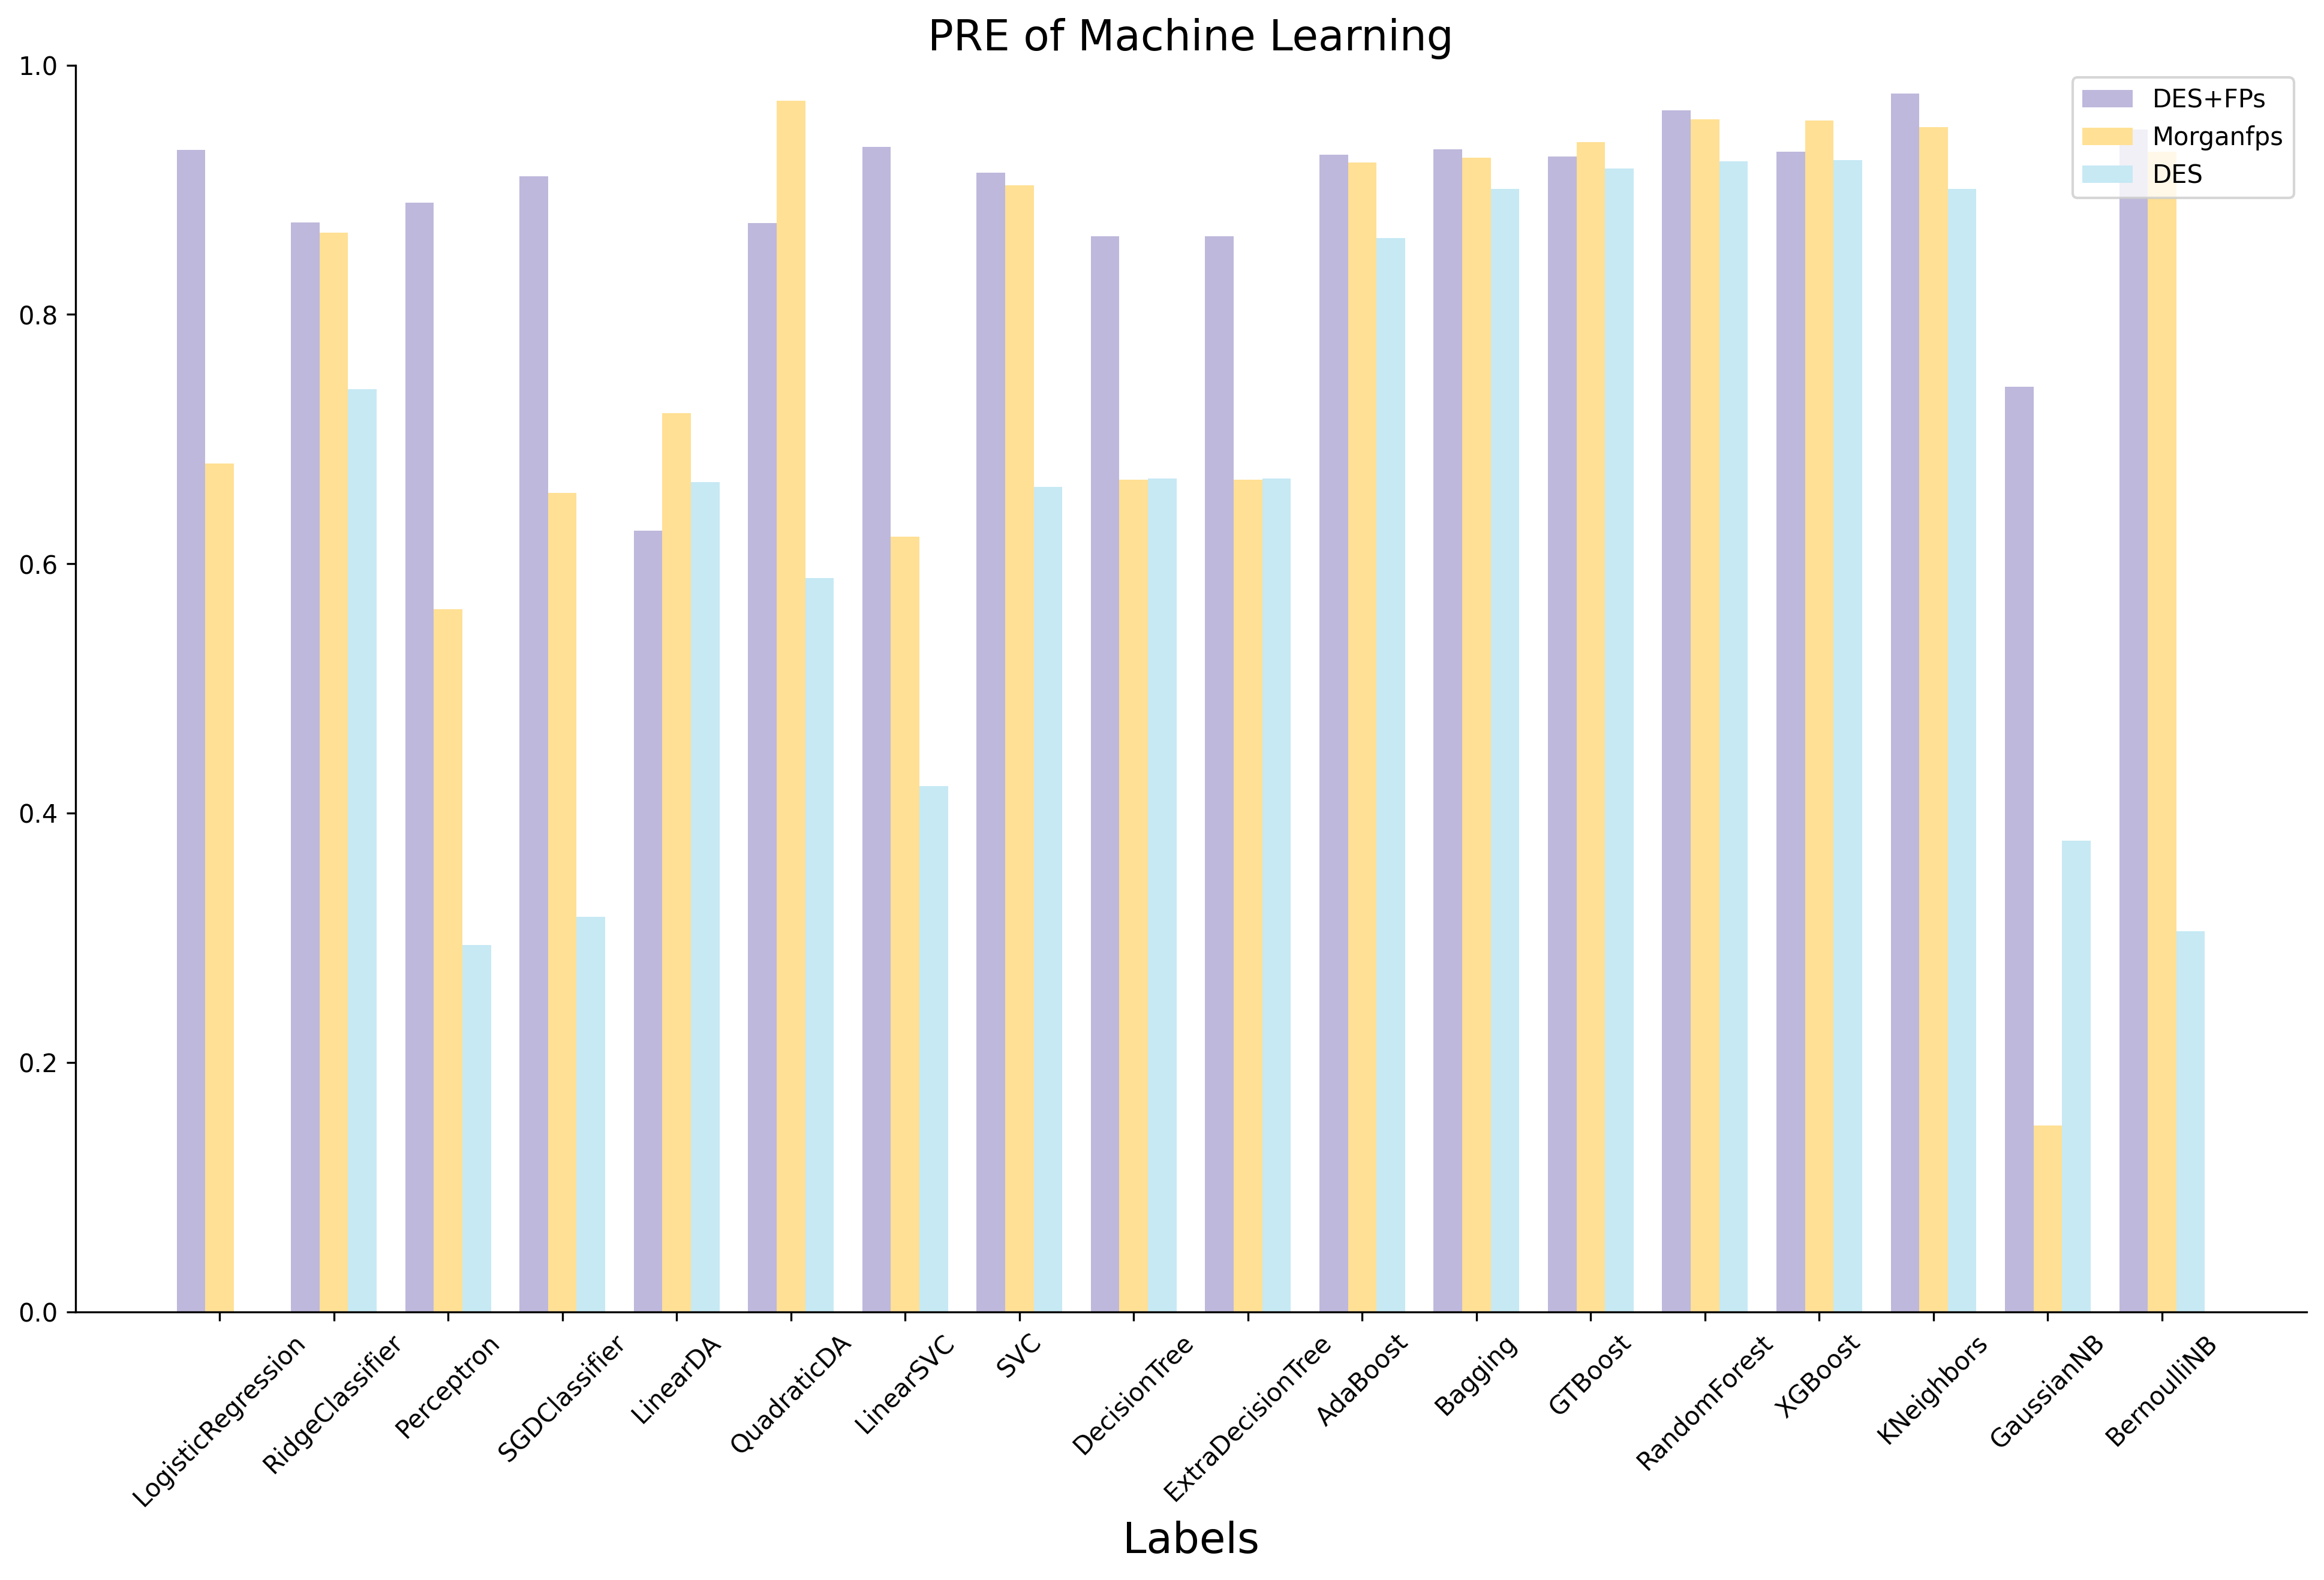

In [9]:
#混合特征
df1 = pd.read_csv('/home/md04/public/jupyter/fbw/AR_AGO分子指纹/柱状图对比/com/DES_PRE_未增强7.csv')
average = []
average = (df1['0']+df1['1']+df1['2']+df1['3']+df1['4'])/5
data_tuples = list(zip(label,df1['0'],df1['1'],df1['2'],df1['3'],df1['4'],average))
df1 = pd.DataFrame(data_tuples,  columns=['label','0','1','2','3','4', 'average'])
df1.to_csv('com_PRE.csv',index=False)
#分子指纹
df2 = pd.read_csv('/home/md04/public/jupyter/fbw/AR_AGO分子指纹/柱状图对比/fps/Morganfps_PRE.csv')
average = []
average = (df2['0']+df2['1']+df2['2']+df2['3']+df2['4'])/5
data_tuples = list(zip(label,df2['0'],df2['1'],df2['2'],df2['3'],df2['4'],average))
df2 = pd.DataFrame(data_tuples,  columns=['label','0','1','2','3','4', 'average'])
df2.to_csv('fps_PRE.csv',index=False)
#分子描述符
df3 = pd.read_csv('/home/md04/public/jupyter/fbw/AR_AGO分子指纹/柱状图对比/des/DES_PRE_未增强.csv')
average = []
average = (df3['0']+df3['1']+df3['2']+df3['3']+df3['4'])/5
data_tuples = list(zip(label,df3['0'],df3['1'],df3['2'],df3['3'],df3['4'],average))
df3 = pd.DataFrame(data_tuples,  columns=['label','0','1','2','3','4', 'average'])
df3.to_csv('des_PRE.csv',index=False)
#读取要绘制的数据
data_1 = df1["average"]
data_2 = df2["average"]
data_3 = df3["average"]

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(label))
fig, ax = plt.subplots(figsize=(16, 9),dpi=300)
# 混合特征的柱状图，注意控制柱子的宽度，这里选择0.2
ax.bar(xticks, data_1, width=0.25, label="DES+FPs", color="#BEB8DC")
# 分子指纹的柱状图，通过微调x轴坐标来调整新增柱子的位置
ax.bar(xticks + 0.25, data_2, width=0.25, label="Morganfps", color="#FFE094")
# 分子描述符的柱状图，继续微调x轴坐标调整新增柱子的位置
ax.bar(xticks + 0.5, data_3, width=0.25, label="DES", color="#C6E9F4")

ax.set_title("PRE of Machine Learning", fontsize=17)
ax.set_xlabel("Labels",fontsize=17)
ax.set_ylabel(ax.get_ylabel(),fontsize=17)
ax.legend(loc="upper right")
ax.set_ylim([0, 1.0])
# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.25)
ax.set_xticklabels(label,rotation= 45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#保存图片
plt.savefig("PRE_对比.jpg",bbox_inches="tight")

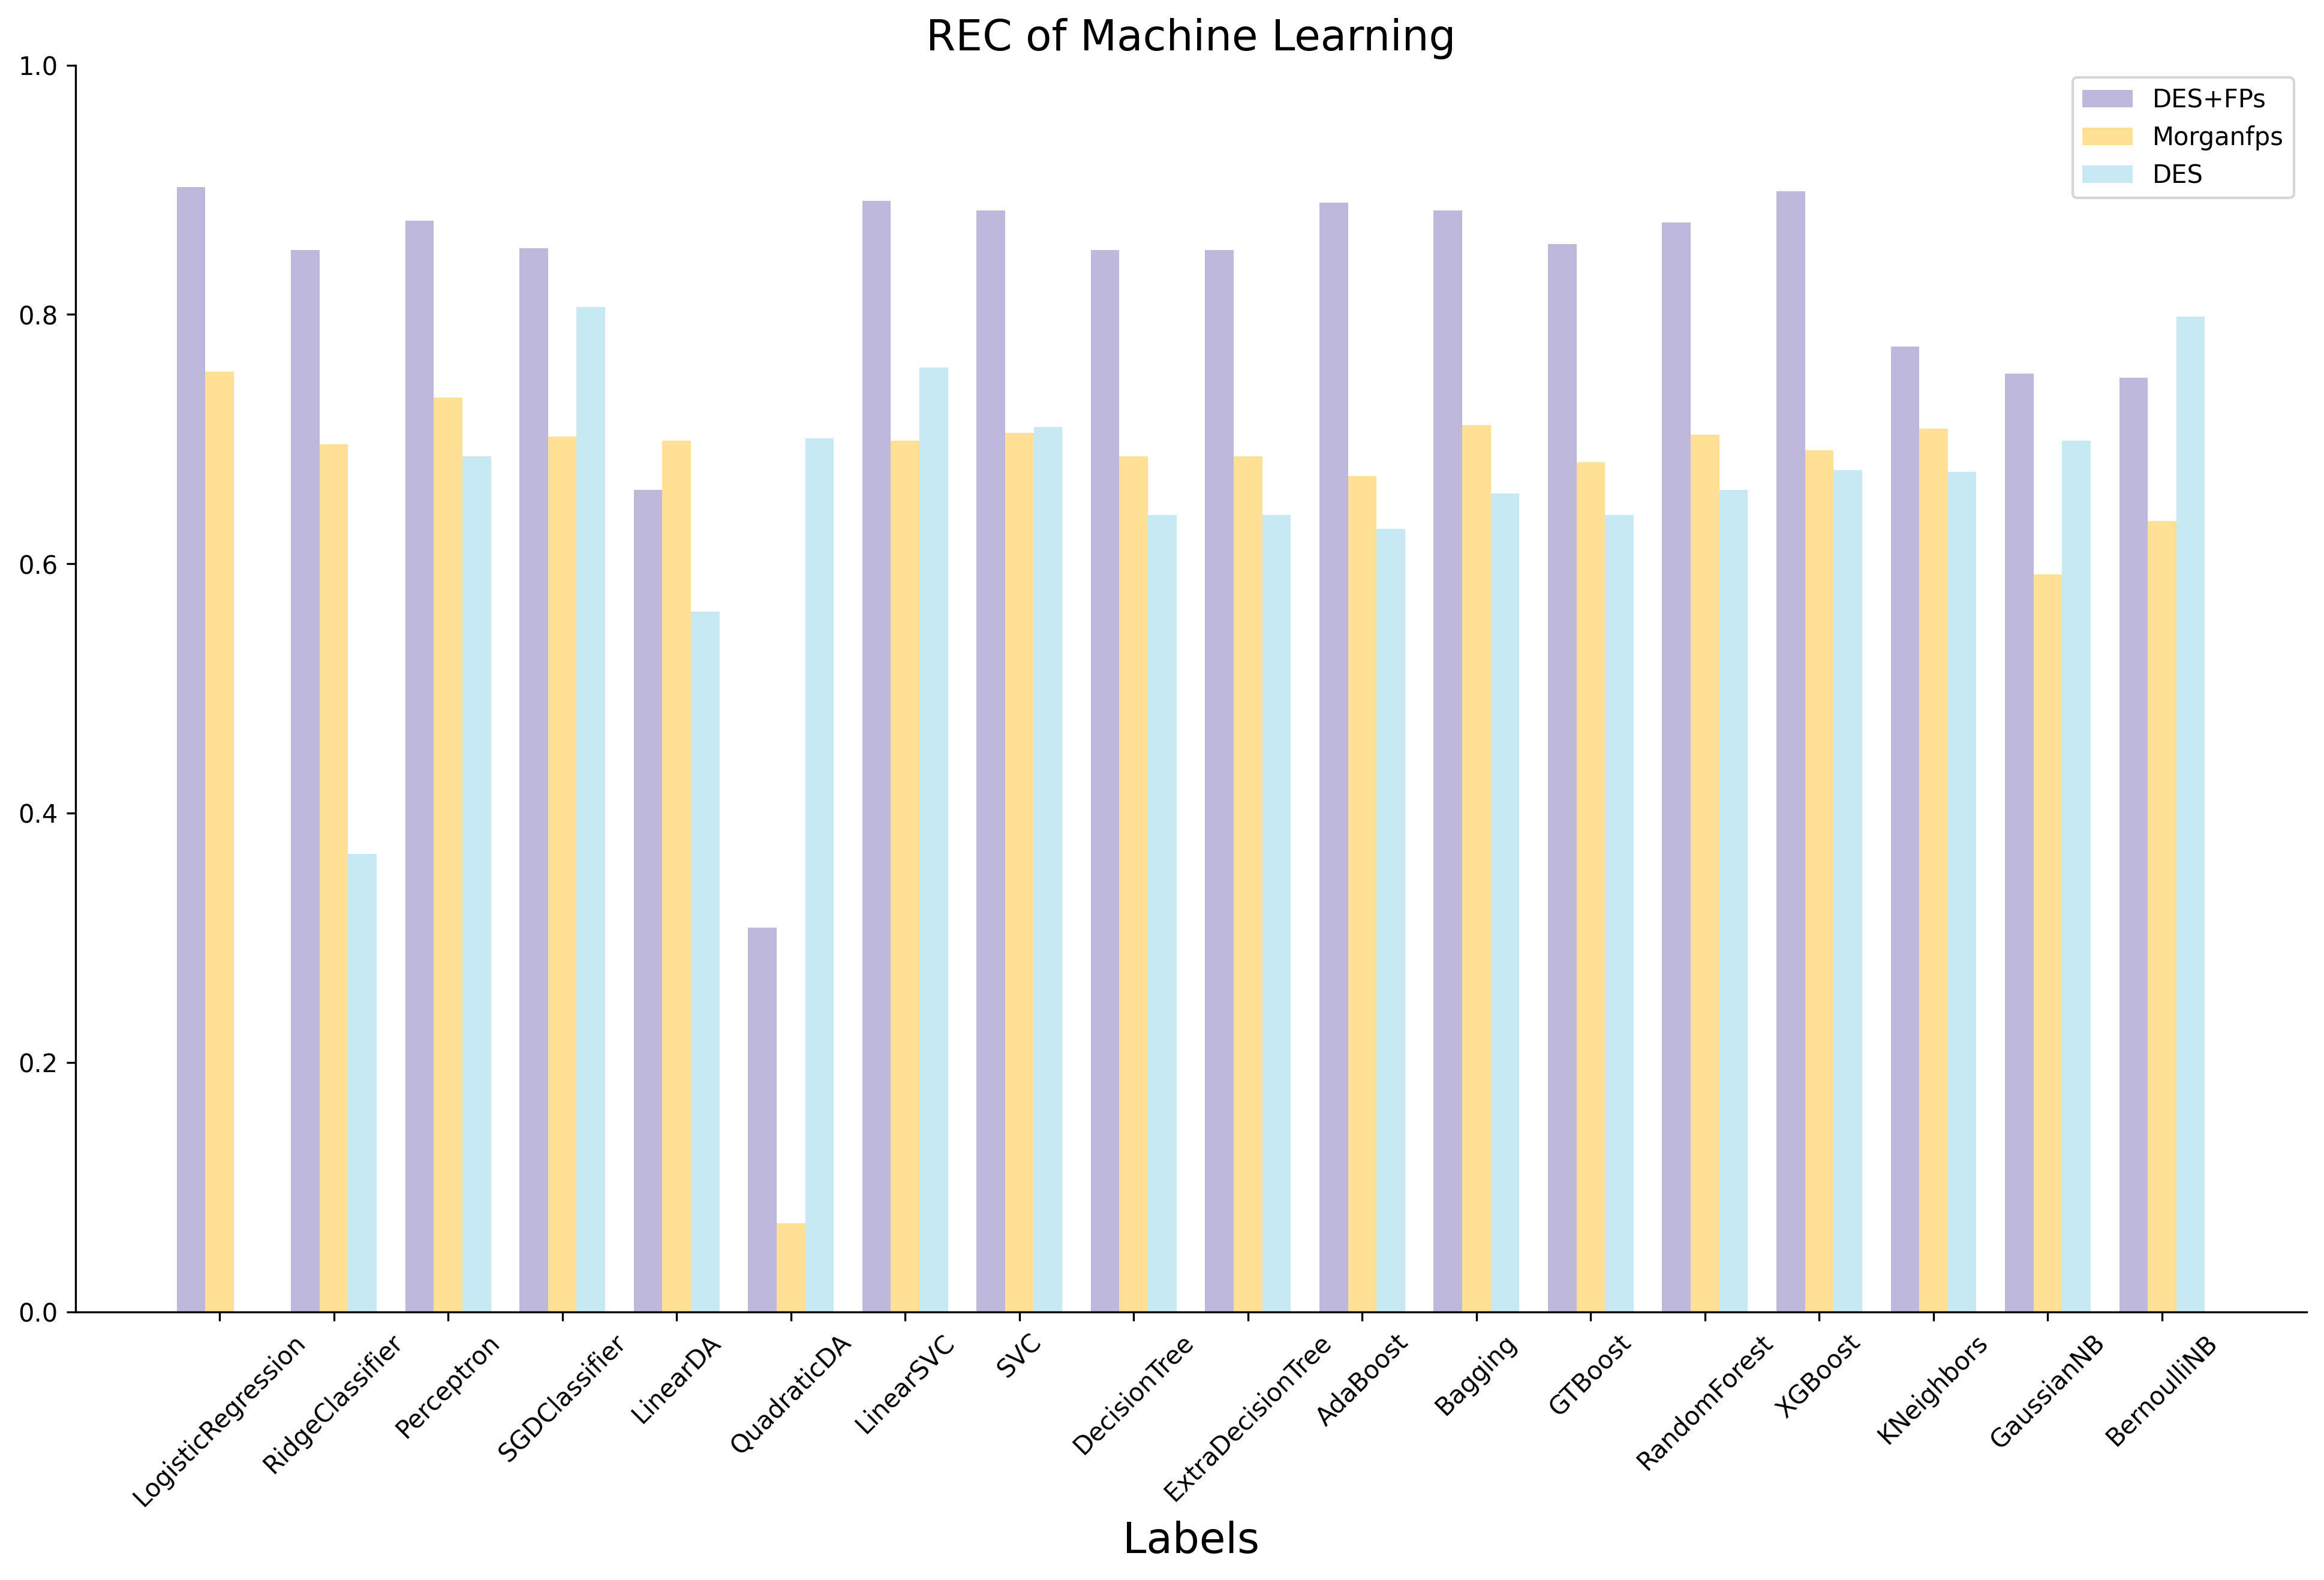

In [4]:
#混合特征
df1 = pd.read_csv('/home/md04/public/jupyter/fbw/AR_AGO分子指纹/柱状图对比/com/DES_REC_未增强7.csv')
average = []
average = (df1['0']+df1['1']+df1['2']+df1['3']+df1['4'])/5
data_tuples = list(zip(label,df1['0'],df1['1'],df1['2'],df1['3'],df1['4'],average))
df1 = pd.DataFrame(data_tuples,  columns=['label','0','1','2','3','4', 'average'])
df1.to_csv('com_REC.csv',index=False)
#分子指纹
df2 = pd.read_csv('/home/md04/public/jupyter/fbw/AR_AGO分子指纹/柱状图对比/fps/Morganfps_REC.csv')
average = []
average = (df2['0']+df2['1']+df2['2']+df2['3']+df2['4'])/5
data_tuples = list(zip(label,df2['0'],df2['1'],df2['2'],df2['3'],df2['4'],average))
df2 = pd.DataFrame(data_tuples,  columns=['label','0','1','2','3','4', 'average'])
df2.to_csv('fps_REC.csv',index=False)
#分子描述符
df3 = pd.read_csv('/home/md04/public/jupyter/fbw/AR_AGO分子指纹/柱状图对比/des/DES_REC_未增强.csv')
average = []
average = (df3['0']+df3['1']+df3['2']+df3['3']+df3['4'])/5
data_tuples = list(zip(label,df3['0'],df3['1'],df3['2'],df3['3'],df3['4'],average))
df3 = pd.DataFrame(data_tuples,  columns=['label','0','1','2','3','4', 'average'])
df3.to_csv('des_REC.csv',index=False)
#读取要绘制的数据
data_1 = df1["average"]
data_2 = df2["average"]
data_3 = df3["average"]

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(label))
fig, ax = plt.subplots(figsize=(16, 9),dpi=300)
# 混合特征的柱状图，注意控制柱子的宽度，这里选择0.2
ax.bar(xticks, data_1, width=0.25, label="DES+FPs", color="#BEB8DC")
# 分子指纹的柱状图，通过微调x轴坐标来调整新增柱子的位置
ax.bar(xticks + 0.25, data_2, width=0.25, label="Morganfps", color="#FFE094")
# 分子描述符的柱状图，继续微调x轴坐标调整新增柱子的位置
ax.bar(xticks + 0.5, data_3, width=0.25, label="DES", color="#C6E9F4")

ax.set_title("REC of Machine Learning", fontsize=17)
ax.set_xlabel("Labels",fontsize=17)
ax.set_ylabel(ax.get_ylabel(),fontsize=17)
ax.legend(loc="upper right")
ax.set_ylim([0, 1.0])
# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.25)
ax.set_xticklabels(label,rotation= 45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#保存图片
plt.savefig("REC_对比.jpg",bbox_inches="tight")

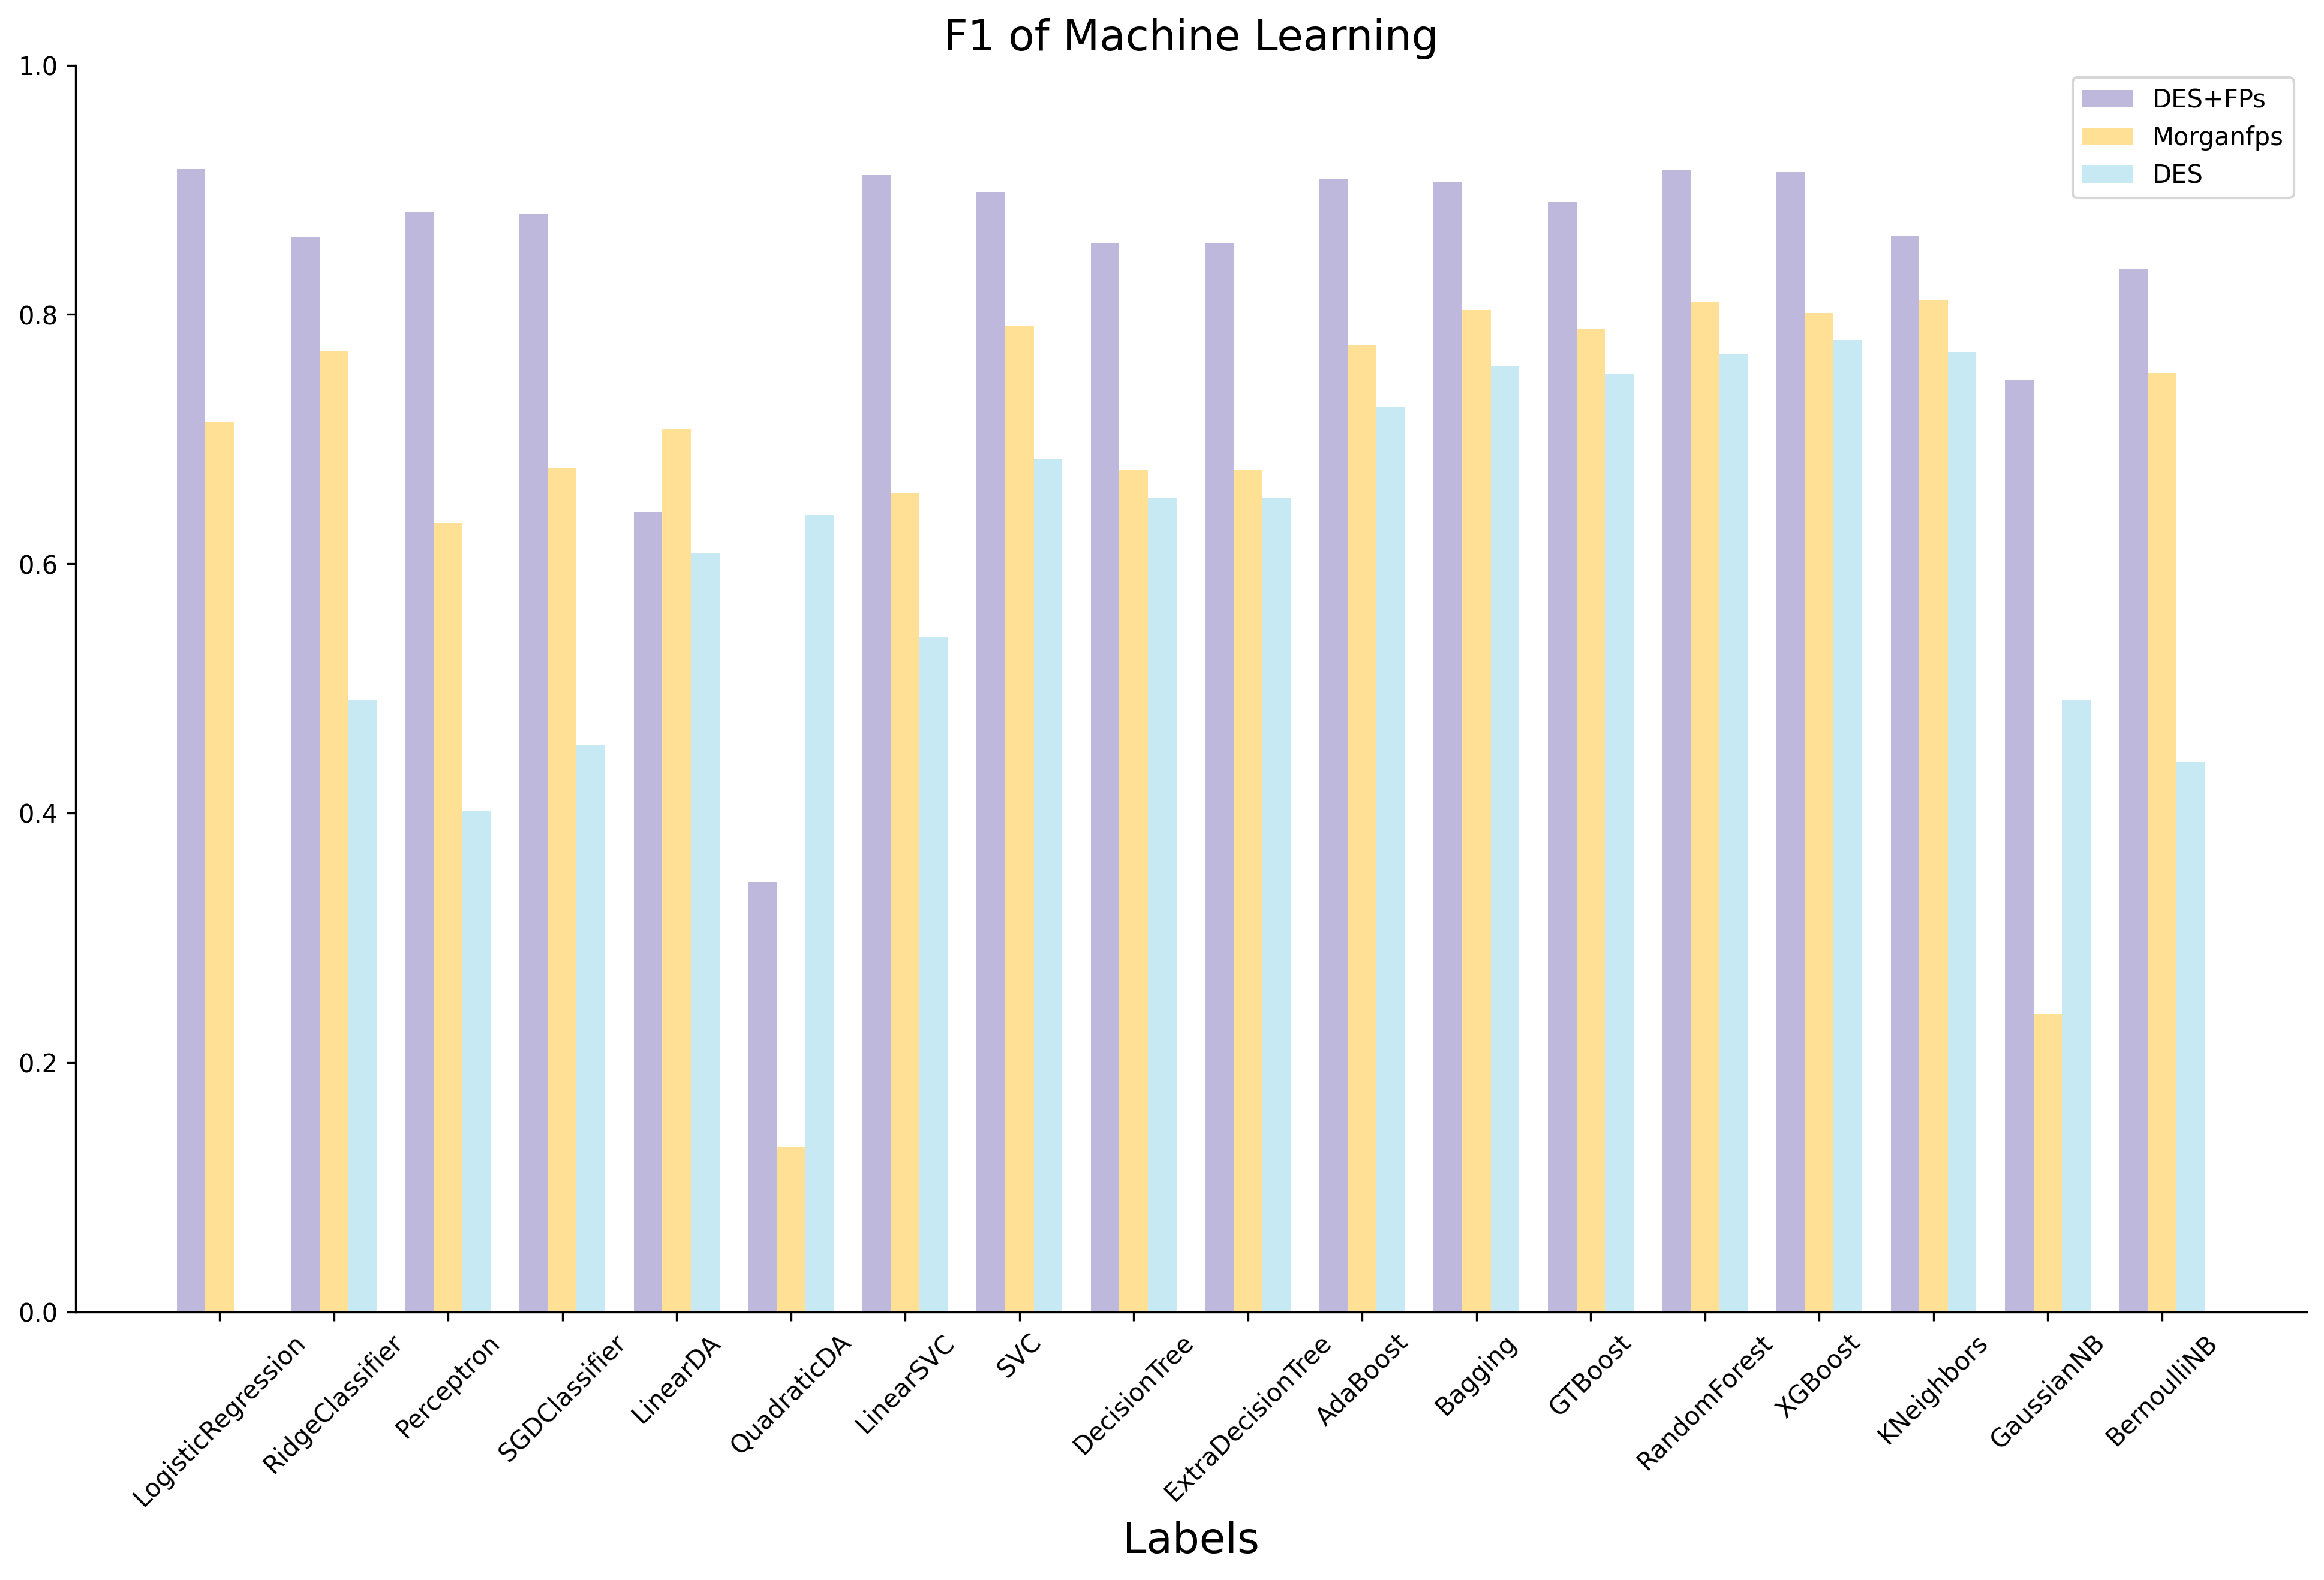

In [5]:
#混合特征
df1 = pd.read_csv('/home/md04/public/jupyter/fbw/AR_AGO分子指纹/柱状图对比/com/DES_F1_未增强7.csv')
average = []
average = (df1['0']+df1['1']+df1['2']+df1['3']+df1['4'])/5
data_tuples = list(zip(label,df1['0'],df1['1'],df1['2'],df1['3'],df1['4'],average))
df1 = pd.DataFrame(data_tuples,  columns=['label','0','1','2','3','4', 'average'])
df1.to_csv('com_F1.csv',index=False)
#分子指纹
df2 = pd.read_csv('/home/md04/public/jupyter/fbw/AR_AGO分子指纹/柱状图对比/fps/Morganfps_F1.csv')
average = []
average = (df2['0']+df2['1']+df2['2']+df2['3']+df2['4'])/5
data_tuples = list(zip(label,df2['0'],df2['1'],df2['2'],df2['3'],df2['4'],average))
df2 = pd.DataFrame(data_tuples,  columns=['label','0','1','2','3','4', 'average'])
df2.to_csv('fps_F1.csv',index=False)
#分子描述符
df3 = pd.read_csv('/home/md04/public/jupyter/fbw/AR_AGO分子指纹/柱状图对比/des/DES_F1_未增强.csv')
average = []
average = (df3['0']+df3['1']+df3['2']+df3['3']+df3['4'])/5
data_tuples = list(zip(label,df3['0'],df3['1'],df3['2'],df3['3'],df3['4'],average))
df3 = pd.DataFrame(data_tuples,  columns=['label','0','1','2','3','4', 'average'])
df3.to_csv('des_F1.csv',index=False)
#读取要绘制的数据
data_1 = df1["average"]
data_2 = df2["average"]
data_3 = df3["average"]

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(label))
fig, ax = plt.subplots(figsize=(16, 9),dpi=300)
# 混合特征的柱状图，注意控制柱子的宽度，这里选择0.2
ax.bar(xticks, data_1, width=0.25, label="DES+FPs", color="#BEB8DC")
# 分子指纹的柱状图，通过微调x轴坐标来调整新增柱子的位置
ax.bar(xticks + 0.25, data_2, width=0.25, label="Morganfps", color="#FFE094")
# 分子描述符的柱状图，继续微调x轴坐标调整新增柱子的位置
ax.bar(xticks + 0.5, data_3, width=0.25, label="DES", color="#C6E9F4")

ax.set_title("F1 of Machine Learning", fontsize=17)
ax.set_xlabel("Labels",fontsize=17)
ax.set_ylabel(ax.get_ylabel(),fontsize=17)
ax.legend(loc="upper right")
ax.set_ylim([0, 1.0])
# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.25)
ax.set_xticklabels(label,rotation= 45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#保存图片
plt.savefig("F1_对比.jpg",bbox_inches="tight")

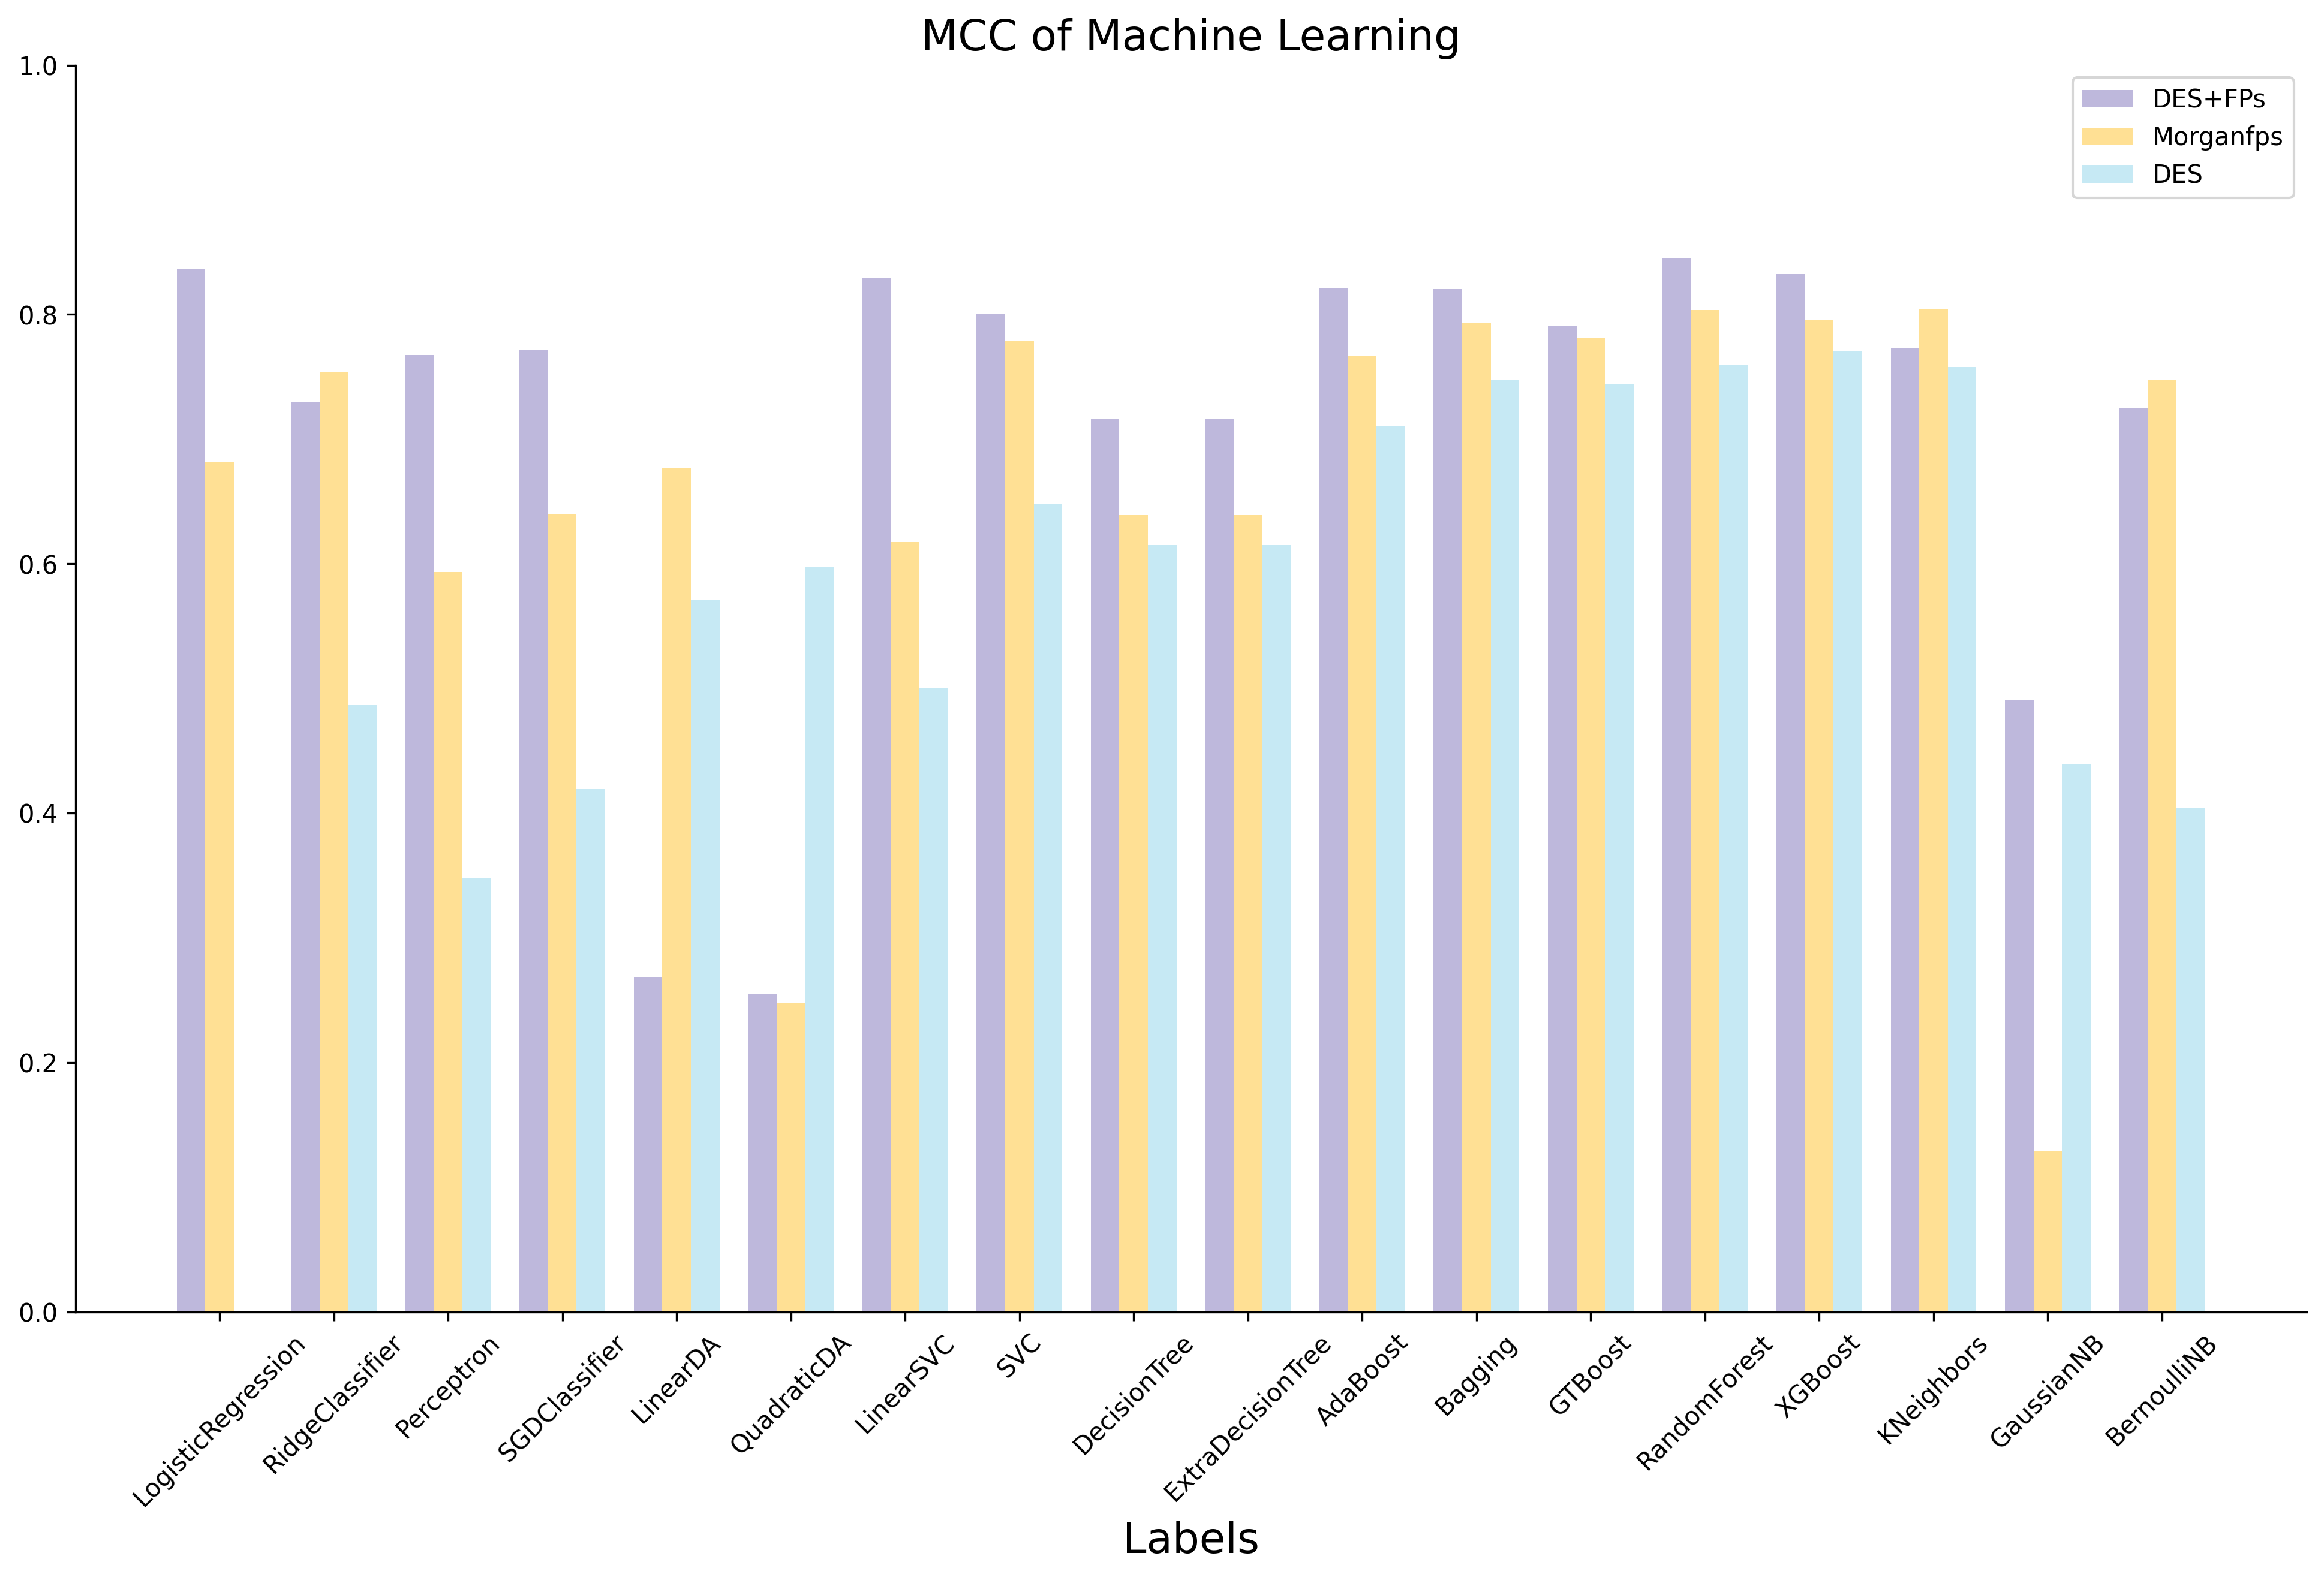

In [6]:
#混合特征
df1 = pd.read_csv('/home/md04/public/jupyter/fbw/AR_AGO分子指纹/柱状图对比/com/DES_MCC_未增强7.csv')
average = []
average = (df1['0']+df1['1']+df1['2']+df1['3']+df1['4'])/5
data_tuples = list(zip(label,df1['0'],df1['1'],df1['2'],df1['3'],df1['4'],average))
df1 = pd.DataFrame(data_tuples,  columns=['label','0','1','2','3','4', 'average'])
df1.to_csv('com_MCC.csv',index=False)
#分子指纹
df2 = pd.read_csv('/home/md04/public/jupyter/fbw/AR_AGO分子指纹/柱状图对比/fps/Morganfps_MCC.csv')
average = []
average = (df2['0']+df2['1']+df2['2']+df2['3']+df2['4'])/5
data_tuples = list(zip(label,df2['0'],df2['1'],df2['2'],df2['3'],df2['4'],average))
df2 = pd.DataFrame(data_tuples,  columns=['label','0','1','2','3','4', 'average'])
df2.to_csv('fps_MCC.csv',index=False)
#分子描述符
df3 = pd.read_csv('/home/md04/public/jupyter/fbw/AR_AGO分子指纹/柱状图对比/des/DES_MCC_未增强.csv')
average = []
average = (df3['0']+df3['1']+df3['2']+df3['3']+df3['4'])/5
data_tuples = list(zip(label,df3['0'],df3['1'],df3['2'],df3['3'],df3['4'],average))
df3 = pd.DataFrame(data_tuples,  columns=['label','0','1','2','3','4', 'average'])
df3.to_csv('des_MCC.csv',index=False)
#读取要绘制的数据
data_1 = df1["average"]
data_2 = df2["average"]
data_3 = df3["average"]

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(label))
fig, ax = plt.subplots(figsize=(16, 9),dpi=300)
# 混合特征的柱状图，注意控制柱子的宽度，这里选择0.2
ax.bar(xticks, data_1, width=0.25, label="DES+FPs", color="#BEB8DC")
# 分子指纹的柱状图，通过微调x轴坐标来调整新增柱子的位置
ax.bar(xticks + 0.25, data_2, width=0.25, label="Morganfps", color="#FFE094")
# 分子描述符的柱状图，继续微调x轴坐标调整新增柱子的位置
ax.bar(xticks + 0.5, data_3, width=0.25, label="DES", color="#C6E9F4")

ax.set_title("MCC of Machine Learning", fontsize=17)
ax.set_xlabel("Labels",fontsize=17)
ax.set_ylabel(ax.get_ylabel(),fontsize=17)
ax.legend(loc="upper right")
ax.set_ylim([0, 1.0])
# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.25)
ax.set_xticklabels(label,rotation= 45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#保存图片
plt.savefig("MCC_对比.jpg",bbox_inches="tight")